# Introducción al aprendizaje automatizado - TP 4
## Autora: Aldana Zarate
### Imports y funciones auxiliares


In [2]:
import tp0
import tp1ej4
import tp3ej1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from copy import deepcopy

import random
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Número de vecinos a ir usando
ns = list(range(2,12)) # no arrancamos en uno para que no de increíblemente bien porque justo quedó el vecino al lado

def entrenar_knn(rango_vecinos, X_train, y_train, X_val, y_val, X_test, y_test):
    # Recolección de errores segun cantidad de vecinos
    train_errors = []
    val_errors = []
    test_errors = []
    knn_model = None

    best_model = None
    best_train_error = None
    best_val_error = None
    best_test_error = None

    for n in rango_vecinos:
        knn_model = KNeighborsClassifier(n_neighbors=n)
        knn_model.fit(X_train, y_train)
        
        # Medimos los errores
        train_error_i = 1 - accuracy_score(knn_model.predict(X_train), y_train)
        val_error_i = 1 - accuracy_score(knn_model.predict(X_val), y_val)
        test_error_i = 1 - accuracy_score(knn_model.predict(X_test), y_test)

        # Chequeo si los resultados con esta cantidad de vecinos es mejor que la actual
        if best_val_error is None or val_error_i < best_val_error:
            k_opt = n
            best_val_error = val_error_i
            best_train_error = train_error_i
            best_test_error = test_error_i
            best_model = deepcopy(knn_model)

        # Guardo los errores registrados en esta evaluacion
        train_errors.append(train_error_i)
        val_errors.append(val_error_i)
        test_errors.append(test_error_i)

    
    return best_model, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt

## Funciones para graficar

In [4]:
# Grafico en base a la cantidad de veces que entreno la red (epocas) o las diferentes cantidades de neuronas que se usaron
# m = [vecinos a probar]
def graficar_curvas_errores(e_train, e_val, e_test, m):
  plt.plot(m,e_train,label="train",linestyle=":")
  plt.plot(m,e_val,label="validacion",linestyle="-.")
  plt.plot(m,e_test,label="test",linestyle="-")
  plt.legend()
  plt.show()

def graficar_predicciones(x, y, title):
  df = pd.DataFrame(x)
  df['Clase'] = y
  df.plot(x=0, y=1, kind='scatter', c = 'Clase', colormap='viridis', title = title)

## Ejercicio 1

### Espirales sin ruido

#### Nearest Neighbour

In [12]:
# Número de vecinos a ir usando
ns = list(range(2,12)) # no arrancamos en uno para que no de increíblemente bien porque justo quedó el vecino al lado

# Datos para ajustar los modelos
col_names = ['x','y','Clase']
train_data = pd.read_csv('c_0.data', names=col_names)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = pd.read_csv('c_0.test', names=col_names)
test_samples = test_data[['x','y']]
test_target = test_data['Clase']

# Errores mínimos segun cant. de vecinos
best_train_errors = []
best_val_errors = []
best_test_errors = []

# Predicciones
y_test_preds = None

best_model, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(ns, X_train, y_train, X_val, y_val, test_samples, test_target)
  
y_test_preds = best_model.predict(test_data[['x','y']])

print(f'Mejor error de validación: {best_val_error}, con k: {k_opt}')
print(f'Error de entrenamiento: {best_train_error}')
print(f'Error de test: {best_test_error}')

Mejor error de validación: 0.06999999999999995, con k: 3
Error de entrenamiento: 0.02749999999999997
Error de test: 0.09650000000000003


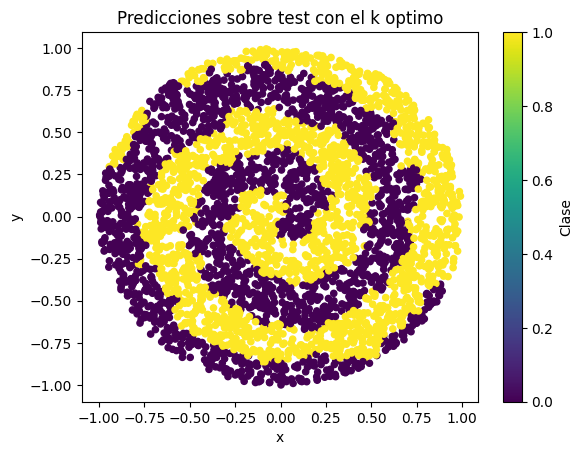

In [13]:
graficar_predicciones(test_data[['x','y']], y_test_preds, "Predicciones sobre test con el k optimo")

#### Curvas de error para nearest neighbours

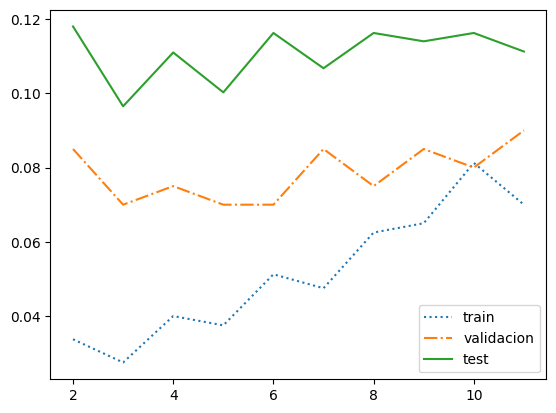

In [15]:
graficar_curvas_errores(train_errors, val_errors, test_errors, ns)

comentarios


### Predicciones con árboles


# Ejercicio 2


In [6]:
def ej2(mink=True):
    # Valores de d
    d_iterable = [2, 4, 8, 16, 32]

    # Datos a guardar pedidos
    train_errors_d = []
    test_errors_d = []

    train_errors_p = []
    test_errors_p = []

    # Guardo la dimension que va teniendo d para poder armar el dataframe a la hora de analizar
    dimensions = []

    for d in d_iterable:
        # Conjuntos de test
        # Diagonal
        d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
        cols = range(0, d)
        X_d_test = d_test[cols]
        y_d_test = d_test['Clase']

        # Paralelo
        p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
        X_p_test = p_test[cols]
        y_p_test = p_test['Clase']
        
        for i in range(0,20):
            # Longitud del conjunto de entrenamiento
            dimensions.append(d)

            # Conjuntos de entrenamiento diagonal
            train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
            X_d_train = train_set_d[cols]
            y_d_train = train_set_d['Clase']

            X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_d_train, y_d_train, test_size=0.2, random_state=0)

            # Conjuntos de entrenamiento paralelo
            train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
            X_p_train = train_set_p[cols]
            y_p_train = train_set_p['Clase']

            X_train_p, X_val_p, y_train_p, y_val_p = train_test_split(X_p_train, y_p_train, test_size=0.2, random_state=0)

            if mink:
                # Modelos y entrenamiento diagonal
                clf_d, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_d, y_train_d, X_val_d, y_val_d, X_d_test, y_d_test)

                # Modelos y entrenamiento paralelo
                clf_p, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error, k_opt = entrenar_knn(
                    ns, X_train_p, y_train_p, X_val_p, y_val_p, X_p_test, y_p_test)
            else:
                clf_d = KNeighborsClassifier(n_neighbors=1)
                clf_p = KNeighborsClassifier(n_neighbors=1)
                clf_d.fit(X_train_d, y_train_d)
                clf_p.fit(X_train_p, y_train_p)

            # Probamos sobre los conjuntos de testeo
            predicted_d = clf_d.predict(d_test[cols])
            predicted_p = clf_p.predict(p_test[cols])

            # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
            # Error = 1 - accuracy
            train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
            test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

            train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
            test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

    return train_errors_d, test_errors_d, train_errors_p, test_errors_p, dimensions


In [ ]:
train_errors_d, test_errors_d, train_errors_p, test_errors_p, dimensions = ej2()
d_iterable = [2, 4, 8, 16, 32]

# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['D'] = dimensions
temp_dataframe_d['TrainError'] = train_errors_d
temp_dataframe_d['TestError'] = test_errors_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['D'] = dimensions
temp_dataframe_p['TrainError'] = train_errors_p
temp_dataframe_p['TestError'] = test_errors_p

# Dataframes finales a usar para la gráfica
df_errors_d = pd.DataFrame({})
df_errors_d['Dimension'] = d_iterable
df_errors_d['TrainError'] = temp_dataframe_d.groupby('D')['TrainError'].mean().to_numpy()
df_errors_d['TestError'] = temp_dataframe_d.groupby('D')['TestError'].mean().to_numpy()

df_errors_p = pd.DataFrame({})
df_errors_p['Dimension'] = d_iterable
df_errors_p['TrainError'] = temp_dataframe_p.groupby('D')['TrainError'].mean().to_numpy()
df_errors_p['TestError'] = temp_dataframe_p.groupby('D')['TestError'].mean().to_numpy()

path = 'datos_errores_redes_d.csv'
datos_errores_redes_d = pd.read_csv(path)
datos_errores_redes_d = datos_errores_redes_d.drop('Unnamed: 0', axis=1)

path = 'datos_errores_redes_p.csv'
datos_errores_redes_p = pd.read_csv(path)
datos_errores_redes_p = datos_errores_redes_p.drop('Unnamed: 0', axis=1)

tree_df_errors_d, tree_df_errors_p = tp1ej4.obtainTreesData()

bayes_df_errors_d, bayes_df_errors_p = tp3ej1.obtainBayesDimData()

plt.plot(df_errors_d['Dimension'], df_errors_d['TrainError'], 'r')
plt.plot(df_errors_d['Dimension'], df_errors_d['TestError'], 'g')
plt.plot(df_errors_p['Dimension'], df_errors_p['TrainError'], 'b')
plt.plot(df_errors_p['Dimension'], df_errors_p['TestError'], 'y')
plt.plot(bayes_df_errors_d['Dimension'], bayes_df_errors_d['TrainError'], 'r', linestyle="dashdot")
plt.plot(bayes_df_errors_d['Dimension'], bayes_df_errors_d['TestError'], 'g',linestyle="dashdot")
plt.plot(bayes_df_errors_p['Dimension'], bayes_df_errors_p['TrainError'], 'b', linestyle="dashdot")
plt.plot(bayes_df_errors_p['Dimension'], bayes_df_errors_p['TestError'], 'y', linestyle="dashdot")
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TrainError'], 'r', linestyle="dotted")
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TestError'], 'g', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TrainError'], 'b', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TestError'], 'y', linestyle="dotted")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TrainError'], 'r', linestyle="dashed")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TestError'], 'g',linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TrainError'], 'b', linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TestError'], 'y', linestyle="dashed")
plt.legend(['Knn Diagonal train error', 'Knn Diagonal test error', 'Knn Parallel train error', 'Knn Parallel test error',
            'Bayes Diagonal train error', 'Bayes Diagonal test error', 'Bayes Parallel train error', 'Bayes Parallel test error',
            'Tree Diagonal train error', 'Tree Diagonal test error', 'Tree Parallel train error', 'Tree Parallel test error',
            'Redes Diagonal train error', 'Redes Diagonal test error', 'Redes Parallel train error', 'Redes Parallel test error'],
            bbox_to_anchor=(1.04,1), ncol=1)
plt.xlabel("D")
plt.ylabel("Error")